In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme() 

In [2]:
elastic_net = pd.read_csv("./metrics/051_elastic_net.csv.zip")
lasso = pd.read_csv("./metrics/051_lasso.csv.zip")
linear_regression = pd.read_csv("./metrics/051_linear_regression.csv.zip")
logistic_regression = pd.read_csv("./metrics/051_logistic_regression.csv.zip")
random_forest = pd.read_csv("./metrics/051_random_forest.csv.zip")
decision_tree = pd.read_csv("./metrics/051_decision_tree.csv.zip")
mlp = pd.read_csv("./metrics/051_mlpr.csv.zip")
xgboost = pd.read_csv("./metrics/051_xgboost.csv.zip")

In [3]:
metrics = pd.concat([elastic_net,lasso,
                     linear_regression,logistic_regression,
                     random_forest,decision_tree,mlp,xgboost])

In [4]:
metrics.sort_values("r2",ascending=False,inplace=True)

In [5]:
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.943220,65.287690,8814.772000,93.887020,2.618876e+15,0.547647,0.033839
0,Random Forest,0.936224,63.331879,9900.922852,99.503380,2.152246e+15,8.511697,0.394769
0,Decision Tree,0.931532,59.951613,10629.394058,103.098953,2.023950e+15,0.870931,0.019068
0,MLP,0.807568,129.079600,29874.117000,172.841310,5.580621e+15,100.547920,0.026862
0,Lasso,0.353680,258.268066,100337.968750,316.761688,5.541303e+15,0.078015,0.016893
0,Linear Regression,0.353660,257.662292,100341.148438,316.766724,5.575402e+15,0.149817,0.021475
0,Elastic Net,0.300550,275.181122,108586.171875,329.524170,5.536112e+15,0.064460,0.019054
0,Logistic Regression,0.054772,265.435883,146741.906250,383.069061,1.471710e+15,1.959041,0.032683


In [6]:
metrics.to_csv("./metrics/052_initial_metrics.csv.zip",index=False,compression="zip")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


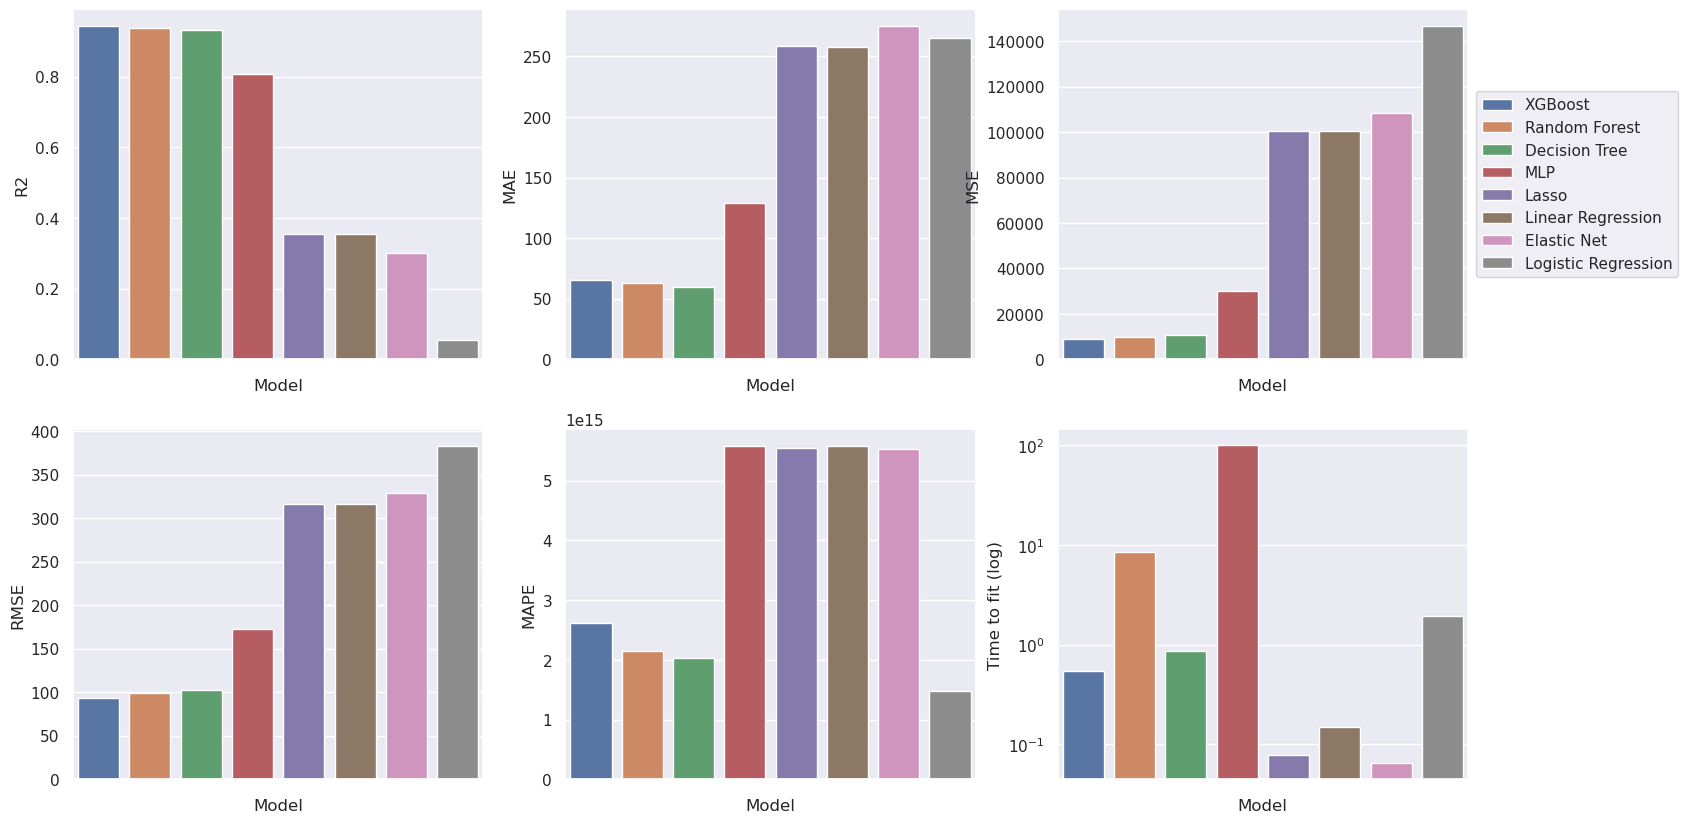

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/052_gardiner_count_weather_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/052_gardiner_count_weather_metrics.png",bbox_inches="tight")